In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.drop(columns='User ID',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [13]:
def gender_encoding(value):
    if value=='Male':
        return 1
    else:
        return 0

In [14]:
df['Gender']=df['Gender'].apply(gender_encoding)

In [15]:
df['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [16]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

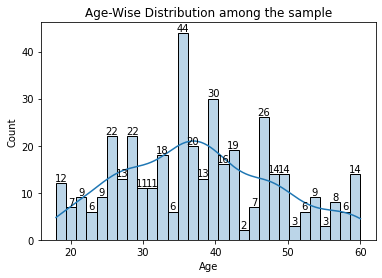

In [17]:
hist1=sns.histplot(df['Age'],kde=True,bins=30,alpha=0.3)
for i in hist1.containers:
    hist1.bar_label(i,)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-Wise Distribution among the sample')
plt.show()

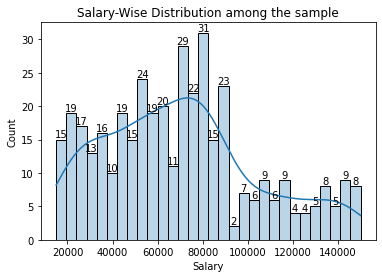

In [18]:
hist2=sns.histplot(df['EstimatedSalary'],kde=True,bins=30,alpha=0.3)
for i in hist2.containers:
    hist2.bar_label(i,)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary-Wise Distribution among the sample')
plt.show()

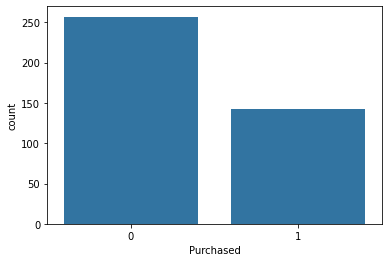

In [19]:
sns.countplot(x='Purchased',data=df)
plt.show()

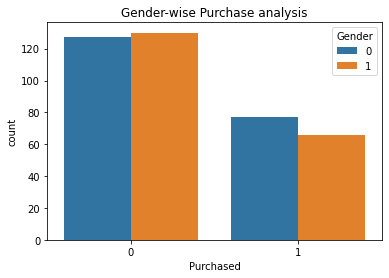

In [20]:
sns.countplot(x='Purchased',data=df,hue='Gender')
plt.title('Gender-wise Purchase analysis')
plt.show()

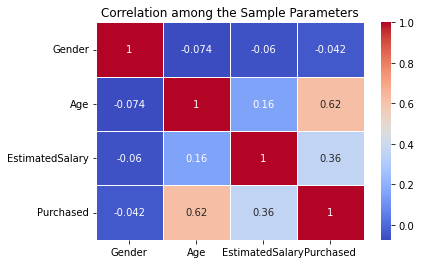

In [21]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True,cmap='coolwarm',linestyle='-',linewidth=0.5)
plt.title('Correlation among the Sample Parameters')
plt.show()

In [22]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']



In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [25]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((320, 2), (80, 2), (320,), (80,))

In [27]:
model=LogisticRegression(random_state=42)
model.fit(xTrain,yTrain)
yPred=model.predict(xTest)

In [28]:
model

LogisticRegression(random_state=42)

In [29]:
conf_mat=confusion_matrix(yTest,yPred)

In [30]:
print(conf_mat)

[[50  2]
 [ 9 19]]


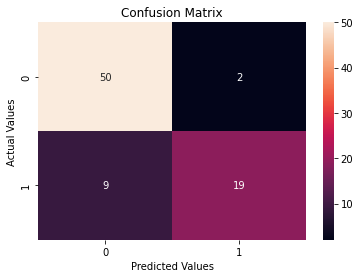

In [31]:
sns.heatmap(conf_mat,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(f'The TN value is {conf_mat[0,0]}')
print(f'The FP value is {conf_mat[0,1]}')
print(f'The FN value is {conf_mat[1,0]}')
print(f'The TP value is {conf_mat[1,1]}')

The TN value is 50
The FP value is 2
The FN value is 9
The TP value is 19


In [33]:
acc=accuracy_score(yTest,yPred)

In [34]:
print(f'The accuracy of the model is {acc*100}')

The accuracy of the model is 86.25


In [35]:
err=1-acc
print(f'The error rate of the model is {err*100}')

The error rate of the model is 13.749999999999996


In [36]:
prec=precision_score(yTest,yPred)
print(f'The Precision displayed by the model is {prec*100}')

The Precision displayed by the model is 90.47619047619048


In [37]:
rec=recall_score(yTest,yPred)
print(f'The Recall shown by the model is {rec*100}')

The Recall shown by the model is 67.85714285714286


In [38]:
f1=f1_score(yTest,yPred)
print(f'The F1-score displayed by the model is {f1*100}')

The F1-score displayed by the model is 77.55102040816327
